In [307]:
#Выполняем необходимые импорты
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm, chi2
import typing as tp
from collections import Counter
from sklearn.preprocessing import PowerTransformer

# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'.

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

N = 19

In [308]:
#Вариант

var_col_num = 19 % 7
var_col_num

5

In [309]:
#Колонка с которой будем работать
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
var_col = cols[var_col_num]
var_col

'Time_on_Gaming'

In [310]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
data = df[var_col]
data

,Time_on_Gaming
0,1.7
1,4.0
2,1.5
3,1.6
4,0.9
...,...
2995,1.8
2996,0.0
2997,0.2
2998,2.6


## I.
### Рассчитайте характеристики:

* Среднее
* Дисперсия
* Мода
* Медиана
* Квантили уровня 0.25, 0.5, 0.75
* Эксцесс
* Ассиметрия
* Интерквартильный размах

In [311]:
#Среднее
mean = data.mean()

print(f"mean: {mean}")

mean: 1.5252666666666663


In [312]:
#Дисперсия
var = data.var()

print(f"var: {var}")

var: 0.869931572746474


In [313]:
#Мода
mode = data.mode()[0]

print(f"mode: {mode}")

mode: 0.0


In [314]:
#Медиана
median = data.median()

print(f"median: {median}")

median: 1.5


In [315]:
#Квантили уровня 0.25, 0.5, 0.75
quantile_1 = np.quantile(data, 0.25)
quantile_2 = np.quantile(data, 0.5)
quantile_3 = np.quantile(data, 0.75)

print(f"quantile_1: {quantile_1}, quantile_2: {quantile_2}, quantile_3: {quantile_3}")

quantile_1: 0.8, quantile_2: 1.5, quantile_3: 2.2


In [316]:
#Эксцесс
kurtosis = data.kurtosis()

print(f"kurtosis: {kurtosis}")

kurtosis: -0.49820635694718174


In [317]:
#Ассиметрия
skew = data.skew()

print(f"skew: {skew}")

skew: 0.2590108181356894


In [318]:
#Интерквартильный размах
interquartile_range = quantile_3 - quantile_1

print(f"interquartile_range: {skew}")

interquartile_range: 0.2590108181356894


### Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

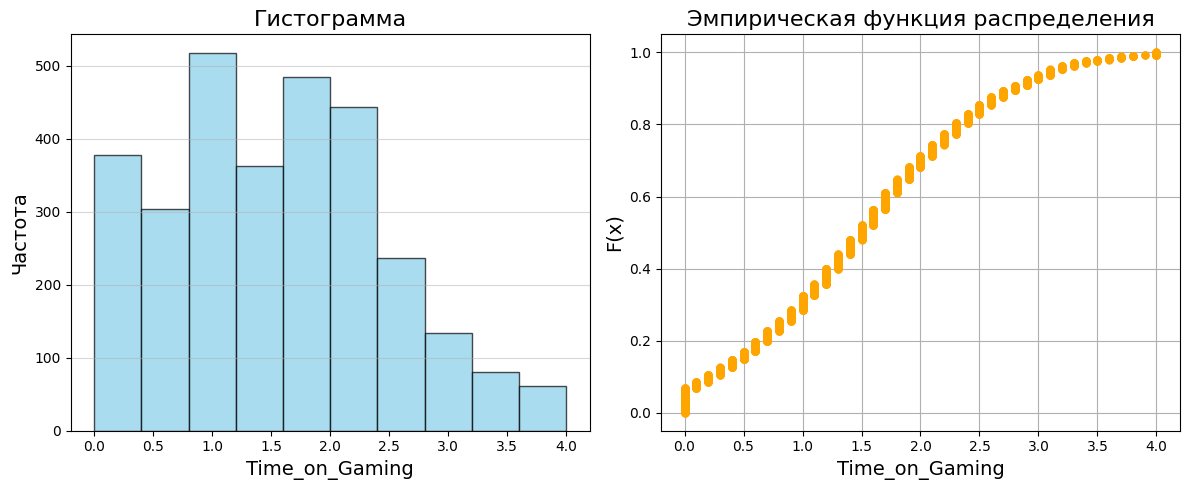

In [319]:
plt.figure(figsize=(12, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title("Гистограмма", fontsize=16)
plt.xlabel(var_col, fontsize=14)
plt.ylabel("Частота", fontsize=14)
plt.grid(axis='y', alpha=0.5)

# Эмпирическая функция распределения
plt.subplot(1, 2, 2)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf, marker='o', linestyle='none', color='orange', markersize=5)
plt.title("Эмпирическая функция распределения", fontsize=16)
plt.xlabel(var_col, fontsize=14)
plt.ylabel("F(x)", fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

## II.
### Проверить данные на нормальность, используя критерии:

* Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
* Ассиметрии и эксцесса

In [320]:
#хи-хи квадрат, ведро, классификатор

def hi_square_test(data: tp.List[float], alpha: float = 0.05) -> bool:
    n = len(data)
    m = 1 + int(np.log2(n))

    edges = np.linspace(np.min(data), np.max(data), m + 1)
    obs_counts, _ = np.histogram(data, bins=edges)
    mean_val = np.mean(data)
    std_val = np.sqrt(np.var(data, ddof=1))
    exp_counts = []

    for i in range(m):
        p = norm.cdf(edges[i+1], mean_val, std_val) - norm.cdf(edges[i], mean_val, std_val)
        exp_counts.append(p * n)

    exp_counts = np.array(exp_counts)
    chi_val = np.sum((obs_counts - exp_counts) ** 2 / (exp_counts + 1e-6))
    df = m - 1 - 2
    crit_val = chi2.ppf(1 - alpha / 2, df) + (1 - chi2.ppf(alpha / 2, df))

    return chi_val < crit_val

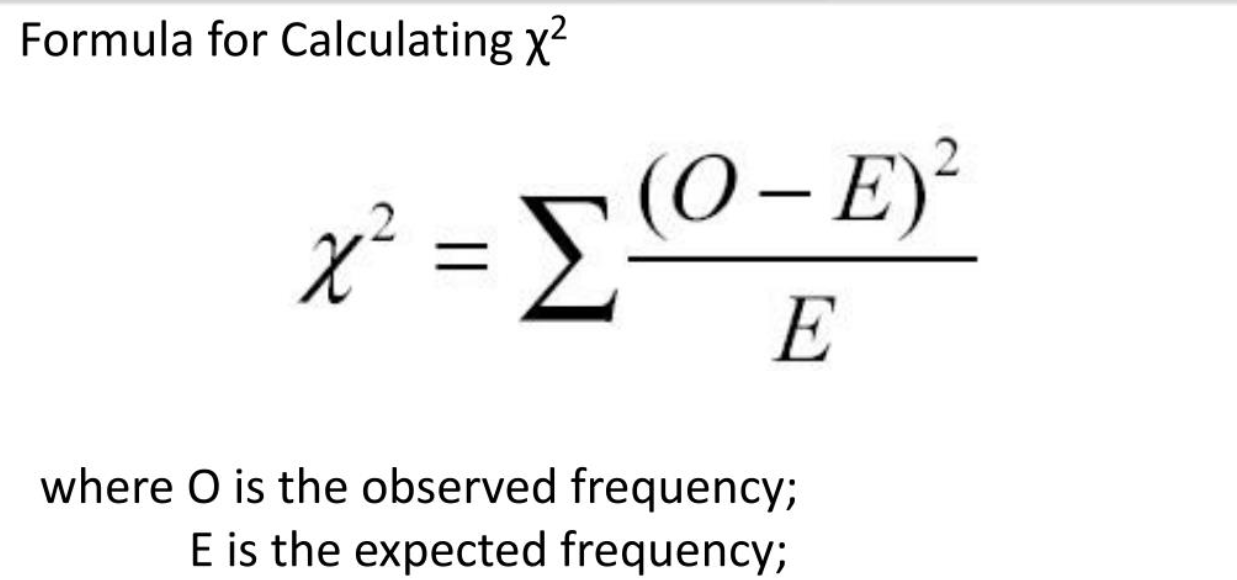

In [321]:
print(f"hi_square_test: {hi_square_test(data)}")

hi_square_test: False


In [322]:
stat, p_value = stats.normaltest(data)

print(f"p_value: {p_value}")
print(p_value > 0.05)

p_value: 4.7612906340491496e-20
False


Оба применённых критерия свидетельствуют об отклонении данных от нормального распределения.

### Построить Q-Q plot

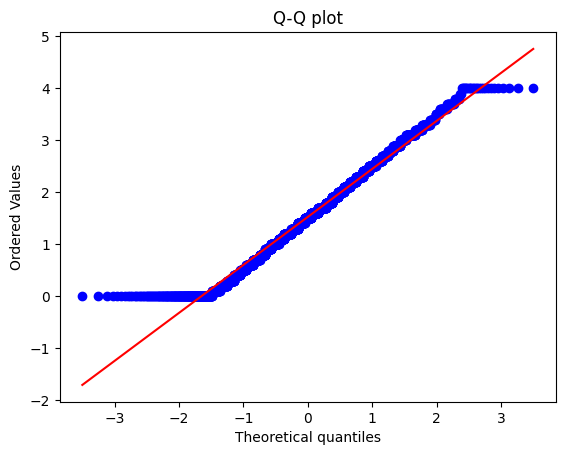

In [323]:
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

Q–Q график также показывает расхождения на концах распределения.

## III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

In [324]:
#Визуально оценим отсортированные данные

sorted(Counter(data).keys())

[0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0]

In [325]:
Counter(data).keys()

dict_keys([1.7, 4.0, 1.5, 1.6, 0.9, 0.0, 2.7, 2.2, 0.4, 0.6, 1.3, 1.2, 1.9, 1.0, 2.6, 0.8, 1.8, 3.2, 1.1, 0.7, 1.4, 2.4, 2.1, 2.0, 2.9, 0.5, 0.2, 2.3, 2.5, 3.5, 3.3, 2.8, 0.3, 3.7, 3.6, 3.1, 3.0, 3.8, 3.4, 0.1, 3.9])

Выраженных выбросов нет, поэтому пункт 1 "Удаление, усечение выбросов" пропускаем



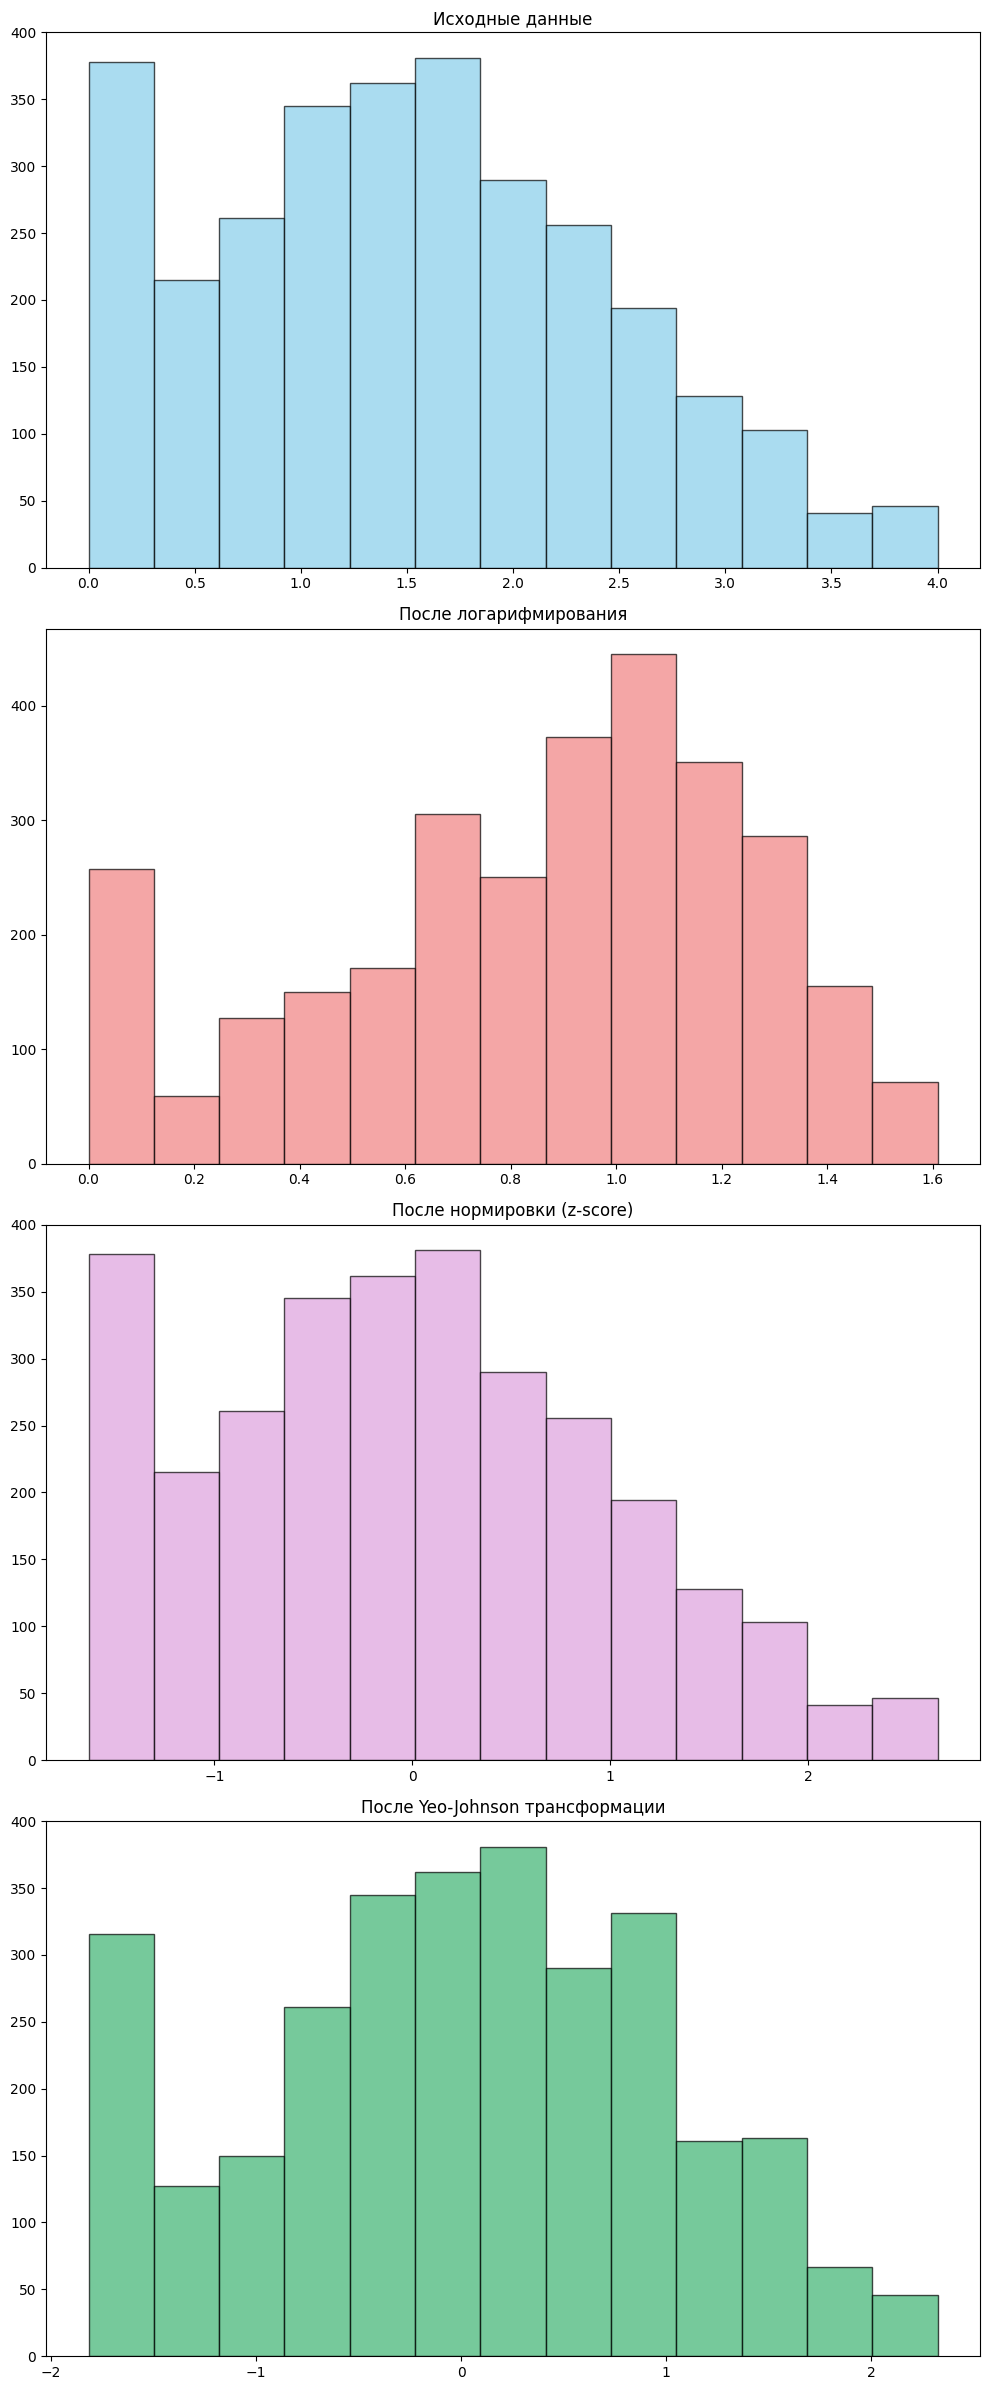

In [326]:
# Логарифмирование
log_transformed = np.log1p(data)

# Стандартизация (z-score)
normalized_data = (data - data.mean()) / data.std()

# Yeo-Johnson трансформация
pt = PowerTransformer(method='yeo-johnson')
yj_transformed = pt.fit_transform(data.values.reshape(-1, 1)).flatten()

# Кол-во корзин по правилу Стерджеса
bins = 2 + int(np.log2(len(data)))

# Визуализация
fig, axes = plt.subplots(4, 1, figsize=(10, 24))

axes[0].hist(data, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Исходные данные')

axes[1].hist(log_transformed, bins=bins, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('После логарифмирования')

axes[2].hist(normalized_data, bins=bins, alpha=0.7, color='plum', edgecolor='black')
axes[2].set_title('После нормировки (z-score)')

axes[3].hist(yj_transformed, bins=bins, alpha=0.7, color='mediumseagreen', edgecolor='black')
axes[3].set_title('После Yeo-Johnson трансформации')

plt.tight_layout()
plt.show()


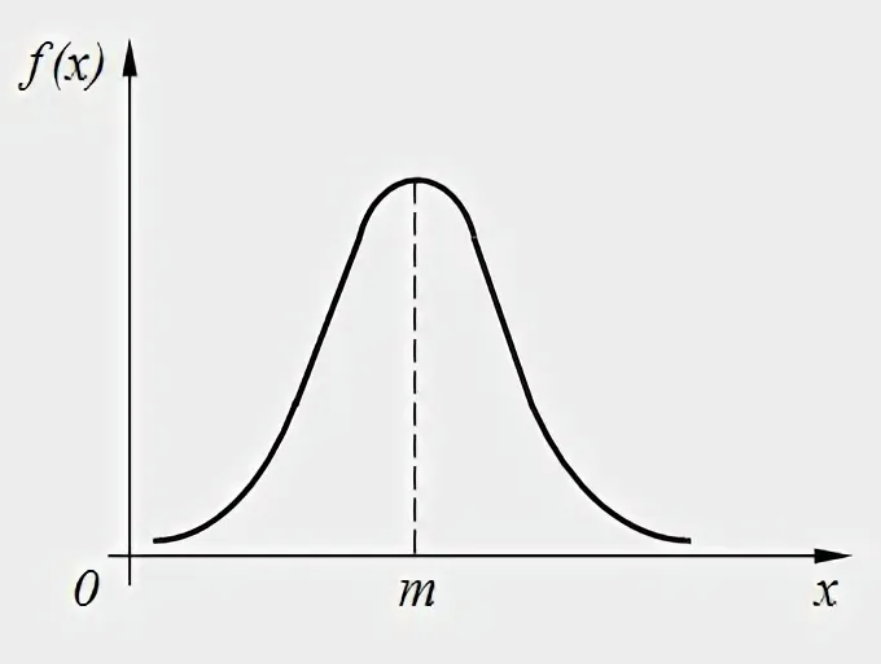

* Нормировка почти не повлияла на распределение
* При логарифмировании картина не то чтобы улучшилась. По ощущению исходные данные больше напоминают нормальное распределние нежели то, что получили
* Yeo-Johnson трансформация привела данные к виду больше всего похожему на нормальный.

Будем использовать последний варинат для дальнейших операций


### Выполните пункты I и II для обработанных данных

In [327]:
new_data = pd.Series(yj_transformed)

In [328]:
#Среднее
mean = new_data.mean()

print(f"mean: {mean}")

mean: 6.927791673660977e-17


In [329]:
#Дисперсия
var = new_data.var()

print(f"var: {var}")

var: 1.0003334444814986


In [330]:
#Мода
mode = new_data.mode()[0]

print(f"mode: {mode}")

mode: -1.817580810322681


In [331]:
#Медиана
median = new_data.median()

print(f"median: {median}")

median: 0.05025253773990866


In [332]:
#Квантили уровня 0.25, 0.5, 0.75
quantile_1 = np.quantile(new_data, 0.25)
quantile_2 = np.quantile(new_data, 0.5)
quantile_3 = np.quantile(new_data, 0.75)

print(f"quantile_1: {quantile_1}, quantile_2: {quantile_2}, quantile_3: {quantile_3}")

quantile_1: -0.7392853559826749, quantile_2: 0.05025253773990866, quantile_3: 0.7543075580818318


In [333]:
#Ассиметрия
skew = new_data.skew()

print(f"skew: {skew}")

skew: -0.05814876394431277


In [334]:
#Интерквартильный размах
interquartile_range = quantile_3 - quantile_1

print(f"interquartile_range: {skew}")

interquartile_range: -0.05814876394431277


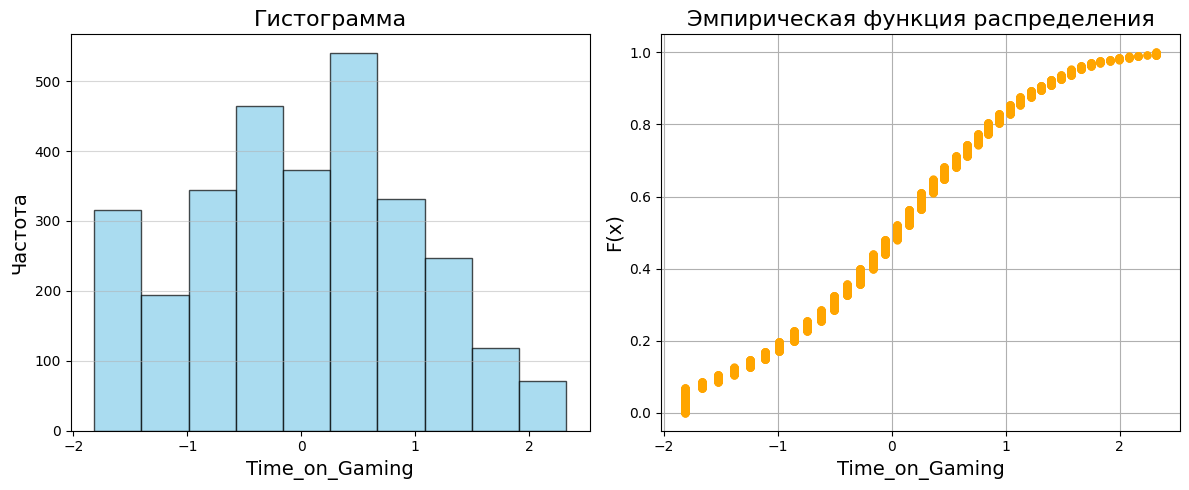

In [335]:
plt.figure(figsize=(12, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(new_data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title("Гистограмма", fontsize=16)
plt.xlabel(var_col, fontsize=14)
plt.ylabel("Частота", fontsize=14)
plt.grid(axis='y', alpha=0.5)

# Эмпирическая функция распределения
plt.subplot(1, 2, 2)
sorted_data = np.sort(new_data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, ecdf, marker='o', linestyle='none', color='orange', markersize=5)
plt.title("Эмпирическая функция распределения", fontsize=16)
plt.xlabel(var_col, fontsize=14)
plt.ylabel("F(x)", fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

In [336]:
print(f"hi_square_test: {hi_square_test(new_data)}")

hi_square_test: False


In [337]:
stat, p_value = stats.normaltest(new_data)

print(f"p_value: {p_value}")
print(p_value > 0.05)

p_value: 1.935092395323581e-27
False


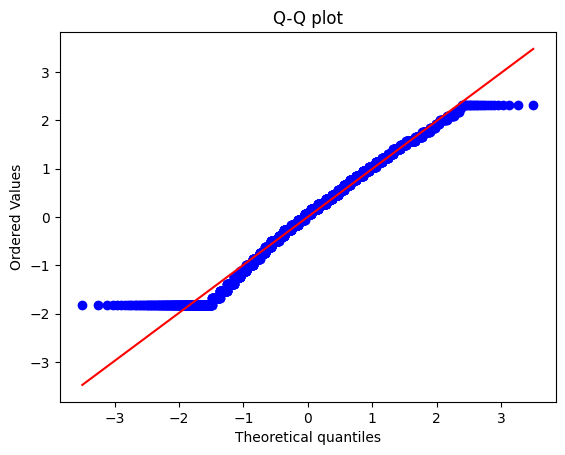

In [338]:
stats.probplot(new_data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

Несмотря на то, что полученные данные после Yeo–Johnson трансформации стали более похожи на нормальное распределение по сравнению с исходными, они всё ещё ему не соответствуют, что доказывают проведённые тесты и Q-Q plot.

## IV.
### Сгруппируйте данные по столбцу 'School_Grade'.

* На одном графике постройте гистограммы для каждой группы.
* Рассчитайте среднее, дисперсию внутри каждой группы


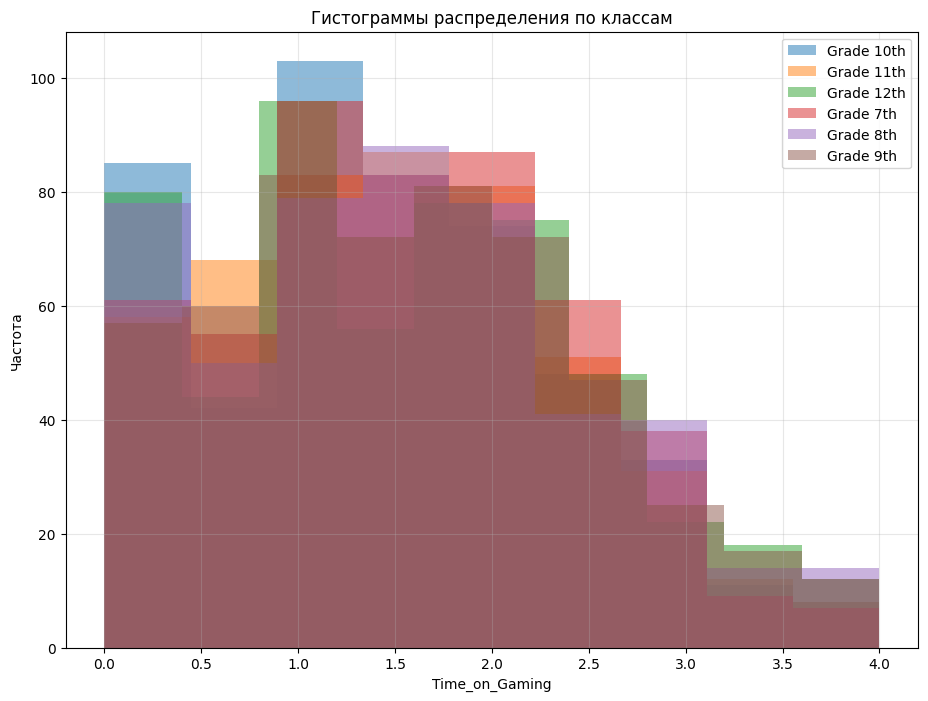

In [339]:
groups = df.groupby("School_Grade")
fig, ax = plt.subplots(figsize=(11, 8))
colors = plt.cm.tab10.colors

for i, (grade, subset) in enumerate(groups):
    n_bins = int(1 + np.log2(len(subset)))
    ax.hist(subset[var_col], bins=n_bins, alpha=0.5,
            label=f"Grade {grade}", color=colors[i % len(colors)])

ax.set_xlabel(var_col)
ax.set_ylabel("Частота")
ax.set_title("Гистограммы распределения по классам")
ax.legend()
ax.grid(alpha=0.3)

plt.show()


In [340]:
stats_by_grade = groups[var_col].agg(mean='mean', var='var')
print(stats_by_grade)

                  mean       var
School_Grade                    
10th          1.453183  0.861384
11th          1.512317  0.787609
12th          1.520227  0.943851
7th           1.554125  0.776682
8th           1.538589  0.964953
9th           1.569392  0.879880


Средние значения по классам в целом схожи. Среднее значение для 10 класса слегка выделяется на фоне остальных. Дисперсия варьируется в зависимости от класса.

## V.
### После каждого пункта сделайте промежуточные выводы:

* Опишите полученные числовые характеристики и графики
* Являются ли данные нормальными
* Эффект от обработки данных (удалось ли привести данные к нормальному виду)
* Различия распределений внутри разных групп 'School_Grade'

см. задания 1-4